In [2]:
import numpy as np
import pandas as pd

In [5]:
person_data = pd.read_csv('C:\\Users\\Shahbaz Khan\\Downloads\\df_person_data.csv')
person_dist = pd.read_csv('C:\\Users\\Shahbaz Khan\\Downloads\\df_person_district.csv')
house_prices = pd.read_csv('C:\\Users\\Shahbaz Khan\\Downloads\\df_districts_house_prices.csv')

In [8]:
person_data.head(2)

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273


In [13]:
person_dist.head(2)

,person_id,district
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone
1,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool


In [12]:
house_prices.head(2)

,district,house_price,house_number
0,Celowsgan,160652.0,1
1,Celowsgan,159219.0,2


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#1. Plot each district's house prices distribution with marking the mean by a vertical line

<Axes: xlabel='district'>

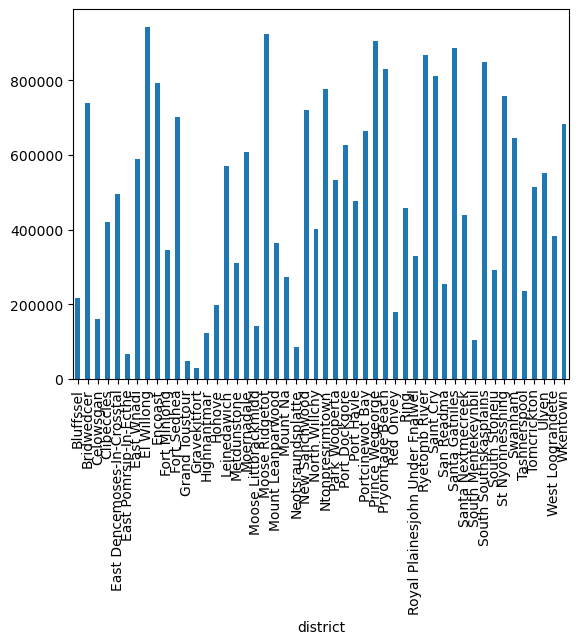

In [35]:
plot = house_prices.groupby('district')['house_price'].mean().plot.bar()
plot

In [ ]:
#2. Combine all of the three data sources into one table to use in further analysis.

In [36]:
merg1 = person_data.merge(person_dist,how='left')
merg2 = house_prices.groupby('district').mean()
mainDF = merg1.merge(merg2, on='district',how='left')
mainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   person_id        70000 non-null  object 
 1   age              69990 non-null  float64
 2   n_kids           70000 non-null  int64  
 3   n_vg             70000 non-null  int64  
 4   n_con            70000 non-null  int64  
 5   n_presub         70000 non-null  int64  
 6   n_hours_playing  70000 non-null  float64
 7   district         70000 non-null  object 
 8   house_price      70000 non-null  float64
 9   house_number     70000 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 5.9+ MB


In [ ]:
#3. Plot age vs avg house price. What does this plot tell you? (younger people live in more expensive districts)

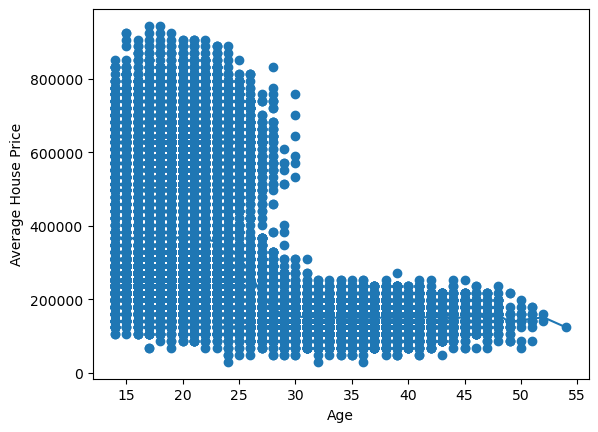

In [45]:
x = mainDF['age']
y = mainDF['house_price']
z = plt.scatter(x,y)
z
avg_house_price = mainDF.groupby('age')['house_price'].mean()
plt.plot(avg_house_price.index, avg_house_price.values)
plt.xlabel('Age')
plt.ylabel('Average House Price')
plt.show()

In [ ]:
#1. What's the probability of a customer having 2 kids

In [48]:
kids_2 = mainDF[mainDF['n_kids'] == 2]
prob_kids = len(kids_2) / len(mainDF)
print("The Probability of customers having 2 kids are:", prob_kids)

The Probability of customers having 2 kids are: 0.10017142857142858


In [ ]:
#2. What's the probability of a customer owning more than 10 video games given that they have less than 2 kids

In [49]:
round(mainDF[mainDF["n_kids"]<2][mainDF["n_vg"]>10].shape[0]/mainDF.shape[0]*100,2)

customer_less_2_kids = mainDF[mainDF['n_kids'] < 2]
customer_more_10_games = customer_less_2_kids[customer_less_2_kids['n_vg'] > 10]

probability_customer = len(customer_more_10_games) / len(customer_less_2_kids)

print("The Probability of cutomer owning more than 10 video games given less than 2 kids are:", probability_customer)

The Probability of cutomer owning more than 10 video games given less than 2 kids are: 0.4018363273453094


In [ ]:
#3. Plot the distribution of the number of hours played by customers n_hours_playing. 
    #Briefly explain what you understand now about the customers' playing hours.

<Axes: xlabel='n_hours_playing', ylabel='Count'>

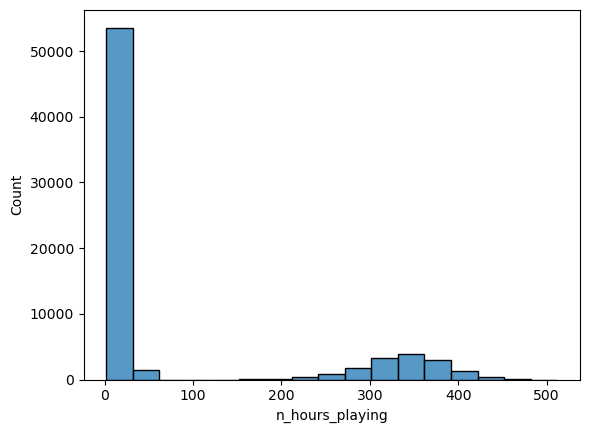

In [40]:
plot1 = sns.histplot(mainDF, x=mainDF['n_hours_playing'],binwidth=30)
plot1

In [ ]:
#4. Estimate the parameters (mean and std deviation) of this normal distribution computationally. \
    #(Bonus: plot the estimated normal distribution on top of the distribution 
        #of n_hours_playing after removing values < 50)

In [51]:
mean_hours = mainDF['n_hours_playing'].mean()
std_hours = mainDF['n_hours_playing'].std()

print("Estimated Mean:", mean_hours)
print("Estimated Standard Deviation:", std_hours)

Estimated Mean: 86.58507315764899
Estimated Standard Deviation: 133.66556897706656


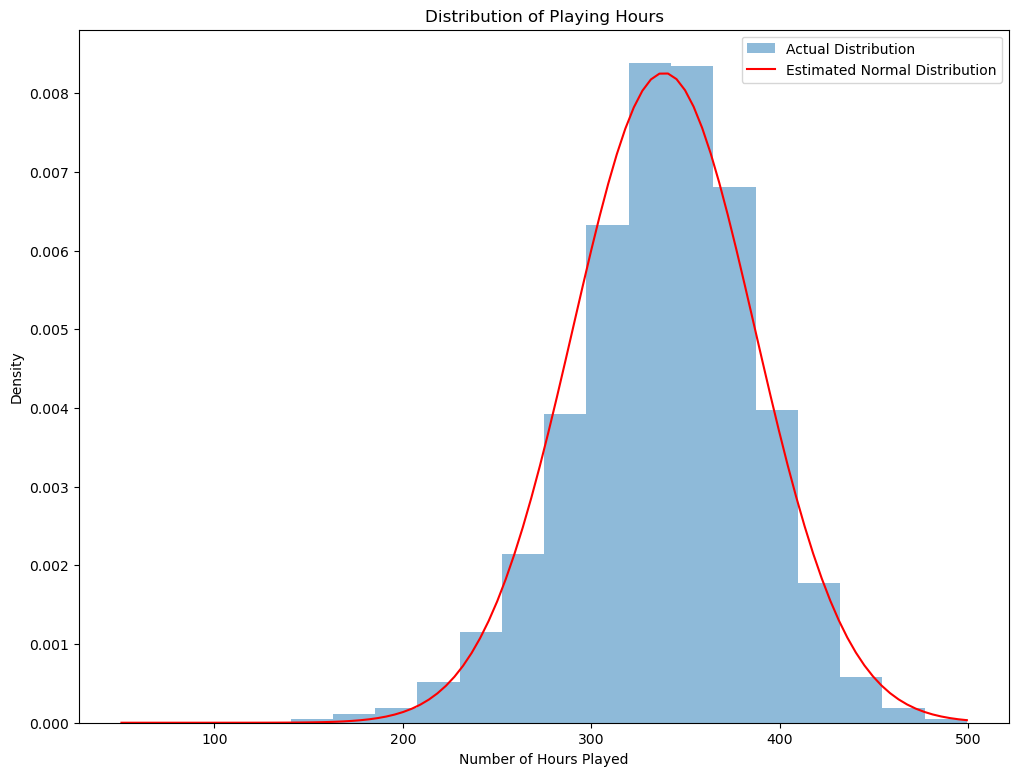

In [52]:
filtered_hours = mainDF[mainDF['n_hours_playing'] >= 50]['n_hours_playing']

mean_hours = filtered_hours.mean()
std_hours = filtered_hours.std()
x = np.linspace(filtered_hours.min(), filtered_hours.max(), 100)
y = (1 / (std_hours * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_hours)**2 / (2 * std_hours**2))

plt.figure(figsize=(12,9))
plt.hist(filtered_hours, bins=20, density=True, alpha=0.5, label='Actual Distribution')
plt.plot(x, y, color='red', label='Estimated Normal Distribution')
plt.xlabel('Number of Hours Played')
plt.ylabel('Density')
plt.title('Distribution of Playing Hours')
plt.legend()
plt.show()

In [54]:
#Modeling

In [77]:
mainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   person_id        70000 non-null  object 
 1   age              70000 non-null  float64
 2   n_kids           70000 non-null  int64  
 3   n_vg             70000 non-null  int64  
 4   n_con            70000 non-null  int64  
 5   n_presub         70000 non-null  int64  
 6   n_hours_playing  70000 non-null  float64
 7   district         70000 non-null  object 
 8   house_price      70000 non-null  float64
 9   house_number     70000 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 7.9+ MB


In [78]:
mainDF.drop(["person_id", "district", "house_price", "house_number"], axis=1, inplace=True)

In [79]:
mainDF.isnull().sum()

age                0
n_kids             0
n_vg               0
n_con              0
n_presub           0
n_hours_playing    0
dtype: int64

In [80]:
mainDF["age"] = mainDF["age"].fillna(mainDF["age"].mode()[0])
mainDF["age"].isnull().sum()

0

In [81]:
x = mainDF.drop(columns=['n_hours_playing'], axis=1)
y = mainDF['n_hours_playing']

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)

In [83]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)
    model.fit(x_train, y_train)
    
    accuracy = model.score(x_test, y_test) * 100
    print("Accuracy:", accuracy)
    
    y_pred_cvp = cross_val_predict(model, x, y, cv=5)
    
    # Calculate the Mean Squared Error and R-Squared score
    mse = mean_squared_error(y, y_pred_cvp)
    r2 = r2_score(y, y_pred_cvp)
    print("Cross Validated R-Squared:", r2)
    print("Cross Validated MSE:", mse)
    print("R2 Score:", r2)
    print("Mean Square Error", mse)

    # scatter plot of predicted vs actual values
    plt.scatter(y, y_pred_cvp, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted VS Actual')
    plt.show()

Accuracy: 81.39834768127258
Cross Validated R-Squared: 0.8147369787609401
Cross Validated MSE: 3309.951580191146
R2 Score: 0.8147369787609401
Mean Square Error 3309.951580191146


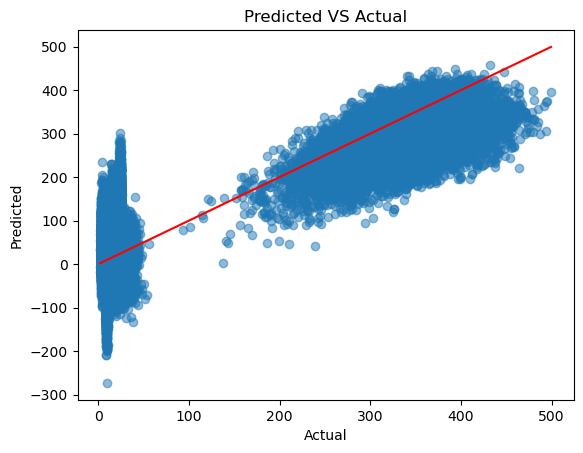

In [85]:
# Create the Linear Regression model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
classify(linreg_model, x, y)

In [88]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

Accuracy: 94.1802603724296
Cross Validated R-Squared: 0.9453972788416003
Cross Validated MSE: 975.5447253975632
R2 Score: 0.9453972788416003
Mean Square Error 975.5447253975632


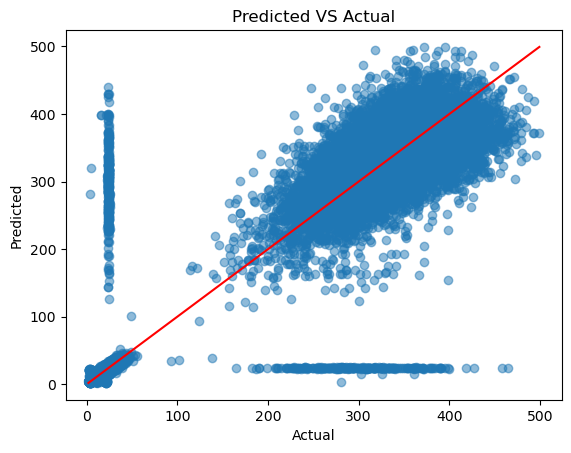

In [89]:
classify(tree_model, x, y)